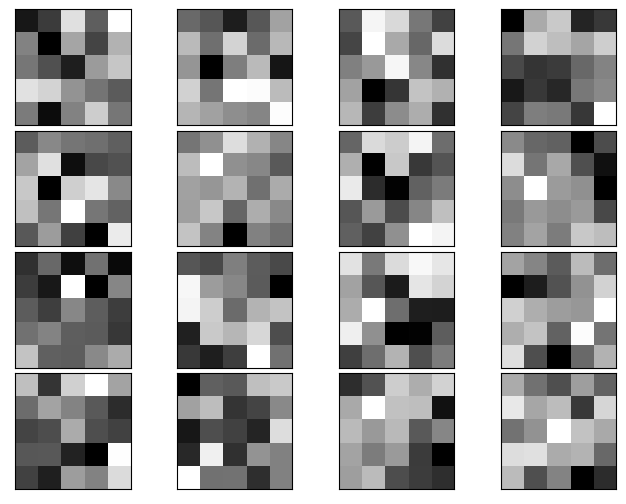

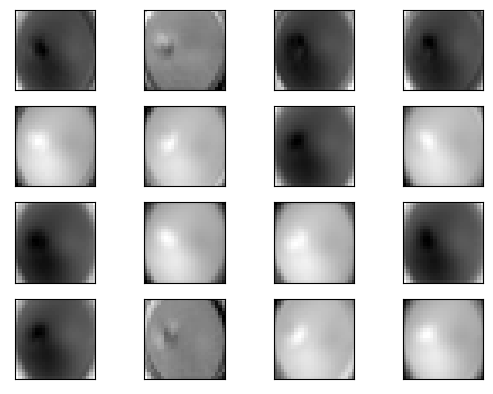

In [28]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet
from matplotlib.image import imread
from common.layers import Convolution
from PIL import Image

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):  
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('L')  
            img = img.resize((28, 28))  # 크기 조정
            img_array = np.array(img) / 255.0  # 정규화
            images.append(img_array)
            
            # 파일 이름에서 레이블 추출 
            label = int(filename.split('_')[1].split('.')[0])  # "_"로 분리한 후 두 번째 부분에서 숫자 추출

    return np.array(images), np.array(labels)

def load_images_with_masks(image_folder, mask_folder):
    images = []
    masks = []
    labels = []
    
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):  
            img_path = os.path.join(image_folder, filename)
            mask_path = os.path.join(mask_folder, filename.replace('.jpg', '.png'))  # Change to .png for masks
            
            
            img = Image.open(img_path).convert('L')
            mask = Image.open(mask_path).convert('L')
            
            # Resize images and masks to 28x28
            img = img.resize((28, 28))
            mask = mask.resize((28, 28))
            
            img_array = np.array(img) / 255.0  # Normalize image
            mask_array = np.array(mask) / 255.0  # Normalize mask (optional)
            
            images.append(img_array)
            masks.append(mask_array)

            label = int(filename.split('_')[1].split('.')[0])  


    return np.array(images), np.array(masks), np.array(labels)

# Define directories
image_dir = 'C:/Users/PC/G1020/Images'
mask_dir = 'C:/Users/PC/G1020/Masks'

# Load images and masks
x_images, x_masks, t_labels = load_images_with_masks(image_dir, mask_dir)

# 학습 및 테스트 데이터 분할
train_size = int(0.8 * len(x_images))
x_test, t_test = x_images[train_size:], t_labels[train_size:]  # x_masked -> x_images로 수정
x_train, t_train = x_images[:train_size], t_labels[:train_size]

def filter_show(filters, nx=4, show_num=16):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(show_num / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(show_num):
        ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')


network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

# 학습된 가중치
network.load_params("params.pkl")

filter_show(network.params['W1'], 16)

fig = plt.figure()

w_idx = 1

for i in range(16):
    w = network.params['W1'][i]
    b = 0  # network.params['b1'][i]

    w = w.reshape(1, *w.shape)
    #b = b.reshape(1, *b.shape)
    conv_layer = Convolution(w, b) 
    out = conv_layer.forward(img)
    out = out.reshape(out.shape[2], out.shape[3])
    
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(out, cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()
